In [5]:
import sys, os

# adjust if built Debug instead of Release
build_dir = os.path.abspath("../build/Release")
if build_dir not in sys.path:
    sys.path.insert(0, build_dir)

import volpy as vp

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
S = 100.0
K = 100.0
r = 0.05
q = 0.02
T = 1.6
vol = 0.2
is_call = True

In [8]:
res = vp.bs_price_greeks(S,K,r,q,T,vol,is_call)

In [9]:
delta = res.delta
gamma = res.gamma
price = res.price
theta = res.theta
rho = res.rho
vega = res.vega
print(f"Price = {price}, ")
print(f"Delta = {delta}, ")
print(f"Gamma = {gamma}, ")
print(f"Theta = {theta}, ")
print(f"Rho = {rho}, ")
print(f"Vega = {vega}")

Price = 11.959650386667109, 
Delta = 0.6044306074913979, 
Gamma = 0.01452807025382482, 
Theta = -4.120923353905803, 
Rho = 77.5734565799563, 
Vega = 46.489824812239426


In [10]:
ks = np.linspace(0,200,1000)
callprices = []
putprices = []
for k in ks:
    c = vp.bs_price(S,k,r,q,T,vol,True)
    callprices.append(c)
    p = vp.bs_price(S,k,r,q,T,vol,False)
    putprices.append(p)

In [11]:
ivs = []
vcallprices = []
vols = np.linspace(0,1,1000)
for vol in vols:
    vc = vp.bs_price(S,K,r,q,T,vol,True)
    vcallprices.append(vc)
for vc in vcallprices:
    iv = vp.implied_vol(S,K,r,q,T,vc,True,0.2,1e-6)
    ivs.append(iv.iv)
print(ivs)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013013014351279835, 0.01401404079881996, 0.015015015112355246, 0.016016016016122812, 0.017017017509809333, 0.018018018024066895, 0.01901901901906301, 0.020020021734153636, 0.02102102113834659, 0.022022022029087866, 0.023023023023407554, 0.02402402402404434, 0.025025025025026175, 0.026026027026389082, 0.027027027248103522, 0.028028028076286904, 0.029029029039486638, 0.030030030032288817, 0.03103103103151927, 0.03203203203213801, 0.033033033033056915, 0.03403403403403847, 0.0350350350350365, 0.036036036036036855, 0.03703703703703719, 0.03803803903334164, 0.03903903953722041, 0.04004004029077068, 0.041041041167952964, 0.042042042106659266, 0.043043043076138994, 0.04404404406109814, 0.04504504505388622, 0.04604604605065742, 0.04704704704946643, 0.04804804804932562, 0.04904904904972756, 0.05005005005041259, 0.051051051051245945, 0.052052052052157426, 0.05305305305311028, 0.054054054054085414, 0.05505505505507237, 0.05605605

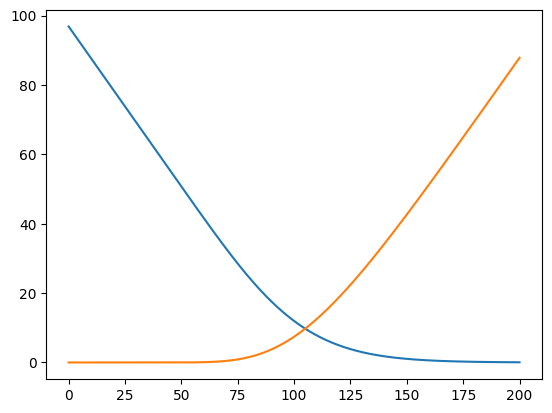

In [12]:
plt.plot(ks,callprices)
plt.plot(ks,putprices)

In [13]:
import math

def forward(S, r, q, T):
    return S * math.exp((r - q) * T)

def log_moneyness(S, K, r, q, T):
    F = forward(S, r, q, T)
    return math.log(K / F)

In [14]:
S, r, q, T = 100.0, 0.01, 0.0, 0.75
is_call = True


strikes = np.linspace(0,300,1000)
mids = np.linspace(0,100,1000)   # your market mids

ks  = []
ivs = []

for K, mid in zip(strikes, mids):
    if mid <= 0:
        continue

    ivr = vp.implied_vol(S, K, r, q, T, mid, is_call)
    if not ivr.converged or ivr.iv <= 0.0:
        continue

    k = log_moneyness(S, K, r, q, T)
    ks.append(k)
    ivs.append(ivr.iv)

print("k (log-moneyness):", ks)
print("implied vols     :", ivs)


k (log-moneyness): [-0.28621340246902044, -0.28225300125292363, -0.2783082229619071, -0.2743789448220177, -0.27046504550088135, -0.26656640508522383, -0.26268290505882635, -0.25881442828090584, -0.254960858964916, -0.25112208265775027, -0.24729798621934698, -0.2434884578026791, -0.2396933868341276, -0.23591266399422142, -0.23214618119874467, -0.2283938315801942, -0.22465550946958715, -0.22093111037860458, -0.21722053098206903, -0.21352366910074275, -0.20984042368444644, -0.206170694795484, -0.20251438359237348, -0.1988713923138724, -0.1952416242632938, -0.19162498379310516, -0.1880213762898067, -0.1844307081590781, -0.1808528868111941, -0.17728782064669793, -0.17373541904233022, -0.17019559233720605, -0.16666825181923772, -0.16315330971179323, -0.15965067916059114, -0.1561602742208226, -0.1526820098444979, -0.1492158018680115, -0.14576156699992407, -0.14231922280895126, -0.138888687712162, -0.13546988096337642, -0.13206272264176222, -0.12866713364062388, -0.12528303565638343, -0.121910

Text(0.5, 0, 'implied volume')

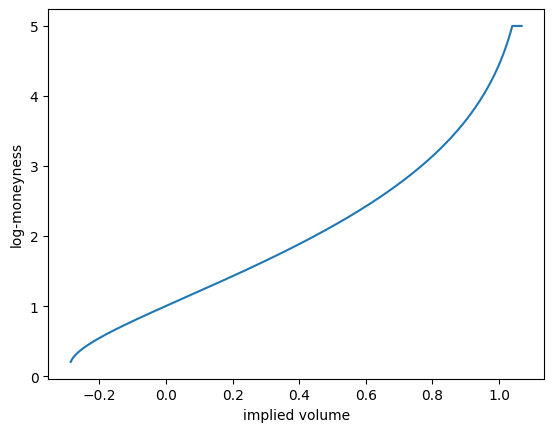

In [15]:
plt.plot(ks,ivs)
plt.ylabel("log-moneyness")
plt.xlabel("implied volume")